In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import odeint
import scipy.interpolate as interp
plt.rcParams['axes.titlesize'] = 20  
plt.rcParams['axes.labelsize'] = 20  
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.titlepad'] = 30 
plt.rcParams['axes.labelpad'] = 16 


In [2]:
#Define a function to calculate intersection point of two lines
def line(p1, p2):
    A = (p1[1] - p2[1])
    B = (p2[0] - p1[0])
    C = (p1[0]*p2[1] - p2[0]*p1[1])
    return A, B, -C

def intersection(x1,y1,x2,y2):
    p1 = [x1[0],y1[0]]
    p2 = [x1[1],y1[1]]
    p3 = [x2[0],y2[0]]
    p4 = [x2[1],y2[1]]
    L1 = line(p1,p2)
    L2 = line(p3,p4)
    D  = L1[0] * L2[1] - L1[1] * L2[0]
    Dx = L1[2] * L2[1] - L1[1] * L2[2]
    Dy = L1[0] * L2[2] - L1[2] * L2[0]
    if D != 0:
        x = np.round((Dx / D), decimals = 3)
        y = np.round((Dy / D), decimals = 3)
        return x,y
    else:
        return False

#Make an array of a single value, to calculate intersection points for horizontal or vertical lines
def makeline(length, value):
    line = np.zeros(len(length))
    line[:] = value
    return line

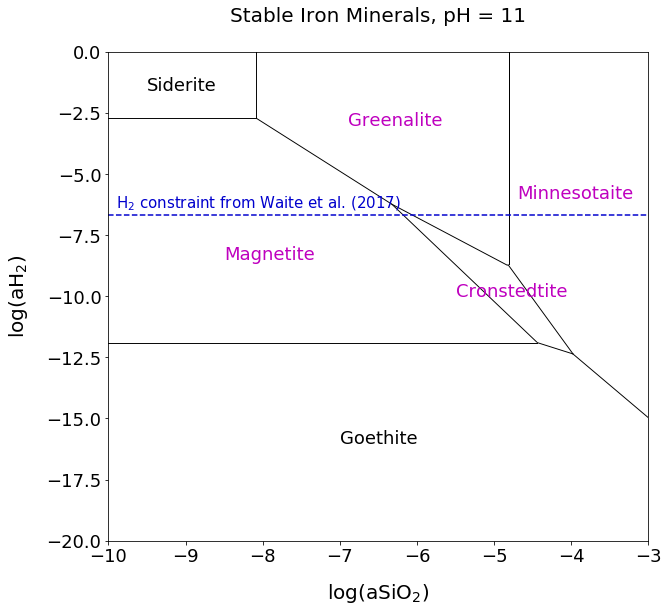

In [3]:
#Mineral State Plots

#pH11
#Iron
CO2 = 10**-7
K11_Fe = np.zeros(10)

#Geothite >> Minnesotaite
K11_Fe[0] = 11.4844
aSi11_Fe0 = np.arange(-3.98, 0, 0.01) 
y11_Fe0 = 2*(-K11_Fe[0] - 1.333*aSi11_Fe0)

#Geothite >> Magnetite
K11_Fe[1] = 1.9832
aSi11_Fe1 = np.arange(-10,-4.44,0.01)
y11_Fe1 = np.zeros(len(aSi11_Fe1))
y11_Fe1[0:] = -6*K11_Fe[1]

#Geothite >> Cronstedtite
K11_Fe[2] = 4.0848
aSi11_Fe2 = np.arange(-4.44, -3.98, 0.01)
y11_Fe2 = -4*K11_Fe[2] -  aSi11_Fe2 

#Magnetite >> Cronstedtite
K11_Fe[3] = 6.3048
aSi11_Fe3 = np.arange(-6.33, -4.44, 0.01)
y11_Fe3 = -4*K11_Fe[3] - 3*aSi11_Fe3

#Magnetite >> Siderite
K11_Fe[4] = 23.7233
aSi11_Fe4 = np.arange(-10, -8.08, 0.01)
y11_Fe4 = np.zeros(len(aSi11_Fe4))
y11_Fe4[0:] = -K11_Fe[4] - 3*np.log10(CO2)

#Magnetite >> Greenalite
K11_Fe[5] = 18.8931
aSi11_Fe5 = np.arange(-8.08, -6.33, 0.01)
y11_Fe5 = -K11_Fe[5] - 2*aSi11_Fe5

#Greenalite >> Minnesotaite
K11_Fe[6] = 9.6106
y11_Fe6 = np.zeros(20)
y11_Fe6[0:] = -(1/2)*K11_Fe[6] 

#Cronstedtite >> Minnesotaite
K11_Fe[7] = 29.5985
aSi11_Fe7 = np.arange(-4.82, -3.98, 0.01)
y11_Fe7 = (1/3)*(-3*K11_Fe[7] - 13*aSi11_Fe7) 

#Greenalite >> Siderite
K11_Fe[8] = -1.6101
y11_Fe8 = (1/2)*(3*np.log10(CO2) - 3*K11_Fe[8])

#Cronstedtite >> Greenalite
K11_Fe[9] = 16.7843
aSi11_Fe9 = np.arange(-6.33, -4.82, 0.01)
y11_Fe9 = -K11_Fe[9] - (5/3)*aSi11_Fe9

fig1 = plt.figure(1)
fig1.set_figheight(9)
fig1.set_figwidth(10)
plt.clf()
plt.plot(aSi11_Fe0, y11_Fe0, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe1, y11_Fe1, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe2, y11_Fe2, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe3, y11_Fe3, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe4, y11_Fe4, color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe5, y11_Fe5, color = 'black', linewidth = 0.95)
plt.plot([y11_Fe6,y11_Fe6], [-8.70,0], color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe7, y11_Fe7, color = 'black', linewidth = 0.95)
plt.plot([y11_Fe8,y11_Fe8], [y11_Fe4[0], 0], color = 'black', linewidth = 0.95)
plt.plot(aSi11_Fe9, y11_Fe9, color = 'black', linewidth = 0.95)
plt.text(-9.5, -1.6, 'Siderite', fontsize = 18)
plt.text(-6.9, -3.0, 'Greenalite', fontsize = 18, color = 'm')
plt.text(-8.5, -8.5, 'Magnetite', fontsize = 18, color = 'm')
plt.text(-5.5, -10, 'Cronstedtite', fontsize = 18, color = 'm')
plt.text(-4.7, -6, 'Minnesotaite', fontsize = 18, color = 'm')
plt.text(-7, -16, 'Goethite', fontsize = 18)
plt.plot([-10,0],[np.log10(2*10**-7), np.log10(2*10**-7)], '--', color = 'mediumblue')
plt.text(-9.9, -6.4, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 15)
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2$)')
plt.title("Stable Iron Minerals, pH = 11") 
plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
plt.subplots_adjust(left=0.15)
plt.savefig('Iron_pH11')


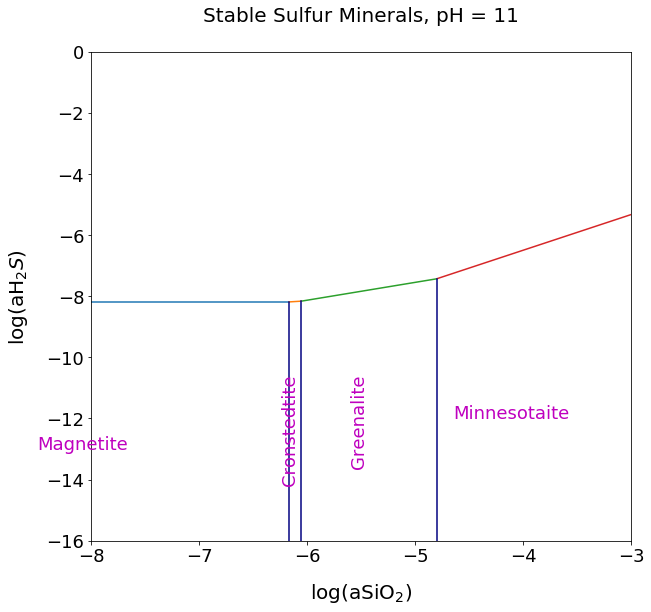

In [4]:

#Sulfur
H2 = 2 * 10**-7
aSiO2 = np.log10(np.logspace(-8,-3,500))

# #Pyrrhotite -> Troilite
# aH2S1 = (1/0.125)*(0.0892 + 0.125*np.log10(H2))

# #Troilite -> Magnetite
# #aH2S2 = -10.736 - 0.333*np.log10(H2)
# #pyrite -> magnetite
# aH2S2 = 0.5*(-13.481 + 0.667*np.log10(H2))

#Magnetite >> Pyrite
# K11_S[0] = 40.4419
# aSi11_S0 = np.arange(-10, -6.17, 0.01)
# y11_S0 = np.zeros(len(aSi11_S0))
# y11_S0[0:] = (1/6)*(-K11_S[0] + 2*np.log10(H2))

# #Cronstedtite >> Pyrite
# aSi11_S1 = np.arange(-6.17, -6.05, 0.001)
# y11_S1 = 0.5*(-11.379+0.75*np.log10(H2)+0.25*aSi11_S1)
# #Cronstedtite -> Pyrrhotite
# #y11_S1 = -8.634 - 0.25*np.log10(H2) + 0.25*aSi11_S1

# #Greenalite >> Pyrite
# aSi11_S2 = np.arange(-6.05, -4.81, 0.01)
# y11_S2 = (1/2)*(-7.183 + np.log10(H2) + 0.667*aSi11_S2)
# #Greenalite -> Troilite
# #y11_S2 = -4.438 + 0.6667*aSi11_S2

# #Minnesotaite >> Pyrite
# aSi11_S3 = np.arange(-4.81, 0, 0.01)
# y11_S3 = (1/2)*(-3.980+ np.log10(H2)+ 1.333*aSi11_S3)
# #Minnesotaite -> Troilite
# #y11_S3 = -1.235 + 1.333*aSi11_S3


#Pyrrhotite:
#Pyrrhotite -> Magnetite:
y11_S1 = -9.305 - 0.1667*np.log10(H2)

#Pyrrhotite -> Cronstedtite
y11_S2 = -7.466 - 0.09375*np.log10(H2) + 0.2188*aSiO2

#Pyrrhotite -> Greenalite
y11_S3 = -3.794 + 0.125*np.log10(H2) + 0.5833*aSiO2

#Pyrrhotite -> Minnesotaite
y11_S4 = 0.125*np.log10(H2) - 0.9913 + 1.167*aSiO2

#Calculate intersection points
line1 = makeline(aSiO2, y11_S1)
x_int1,y_int1 = intersection(aSiO2,line1,aSiO2,y11_S2)
x_int2,y_int2 = intersection(aSiO2,y11_S2,aSiO2,y11_S3)
x_int3,y_int3 = intersection(aSiO2,y11_S3,aSiO2,y11_S4)


fig2 = plt.figure(2)
fig2.set_figheight(9)
fig2.set_figwidth(10)
plt.clf()

#plt.plot(aSi11_S0, y11_S0, color = 'navy') #Troilite -> Magnetite
# plt.plot(aSi11_S1, y11_S1, color = 'navy') #FeS -> Cronstedtite
# plt.plot(aSi11_S2, y11_S2, color = 'navy') #FeS -> Greenalite
# plt.plot(aSi11_S3, y11_S3, color = 'navy') #Troilite -> Minnesotaite
# plt.plot([-6.17, -6.17], [-16, aH2S2], color = 'navy') #magnetite -> cronstedtite
# plt.plot([-6.05, -6.05], [-16, y11_S1[-100]], color = 'navy') #Cronstedtite -> Greenalite
# plt.plot([-4.81, -4.81], [-16, y11_S2[-1]], color = 'navy') #greenalite -> minnesotaite
# #plt.plot([-8, x_int1-0.01], [aH2S1,aH2S1], color = 'black') #pyrrhotite -> troilite
#plt.plot([-8, -6.17], [aH2S2,aH2S2], color = 'black') #FeS -> magnetite

#Pyrrhotite:
plt.plot([-8, x_int1], [y11_S1, y11_S1])
plt.plot(aSiO2[(x_int1 < aSiO2) & (aSiO2 < x_int2)], y11_S2[(y_int1 < y11_S2) & (y11_S2 < y_int2)])
plt.plot(aSiO2[(x_int2 < aSiO2) & (aSiO2 < x_int3)], y11_S3[(y_int2 < y11_S3) & (y11_S3 < y_int3)])
plt.plot(aSiO2[(x_int3 < aSiO2)], y11_S4[(y_int3 < y11_S4)])
plt.plot([x_int1, x_int1], [-16, y_int1], color = 'navy')
plt.plot([x_int2, x_int2], [-16, y_int2], color = 'navy') #Cronstedtite -> Greenalite
plt.plot([x_int3, x_int3], [-16, y_int3], color = 'navy') #Cronstedtite -> Greenalite

#plt.text(-6.8, -4.5, 'Pyrite', fontsize = 18)
plt.text(-8.5, -13, 'Magnetite', fontsize = 18, color = 'm')
plt.text(-4.65, -12, 'Minnesotaite', fontsize = 18, color = 'm')
plt.text(-6.24, -11, 'Cronstedtite', fontsize = 18, rotation = 90, color = 'm')
plt.text(-5.6, -11, 'Greenalite', fontsize = 18, rotation = 90, color = 'm')
plt.xlim(-8,-3)
plt.ylim(-16,0)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2S$)')
plt.title("Stable Sulfur Minerals, pH = 11") 
#plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
#plt.subplots_adjust(left=0.2, right=0.85, top=0.8, bottom=0.15)
plt.subplots_adjust(left=0.15)
plt.savefig('Sulfur_pH11')


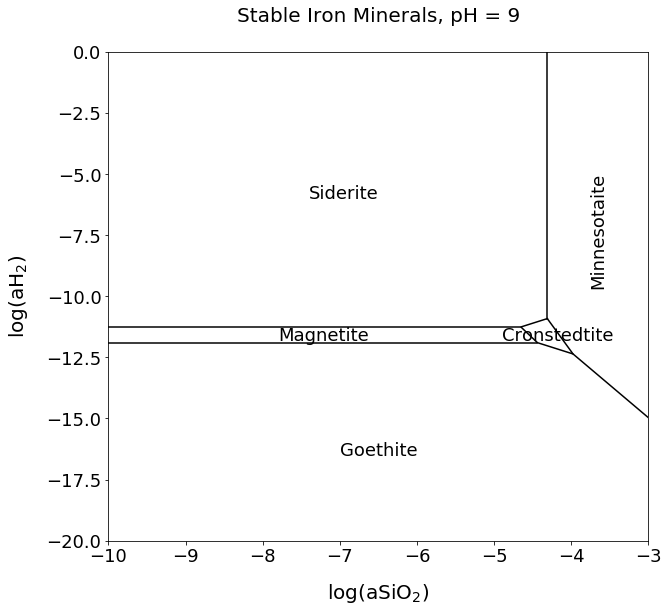

In [5]:
#pH9
K9_Fe = np.zeros(7)
CO2 = 7 * 10**-5

#Goethite >> Magnetite
K9_Fe[0] = 1.9832
aSi9_Fe0 = np.arange(-10, -4.44, 0.01)
y9_Fe0 = np.zeros(len(aSi9_Fe0))
y9_Fe0[0:] = -6*K9_Fe[0]

#Goethite >> Cronstedtite
K9_Fe[1] = 4.0848
aSi9_Fe1 = np.arange(-4.44, -3.98, 0.01)
y9_Fe1 = -4*K9_Fe[1] - aSi9_Fe1

#Goethite >> Minnesotaite
K9_Fe[2] = 11.4844
aSi9_Fe2 = np.arange(-3.98, 0, 0.01)
y9_Fe2 = (1/3)*(-6*K9_Fe[2] - 8*aSi9_Fe2)

#Magnetite >> Siderite
K9_Fe[3] = 23.7233
aSi9_Fe3 = np.arange(-10, -4.65, 0.01)
y9_Fe3 = np.zeros(len(aSi9_Fe3))
y9_Fe3[0:] = -K9_Fe[3] - 3*np.log10(CO2)

#Magnetite >> Cronstedtite
K9_Fe[4] = 6.3048
aSi9_Fe4 = np.arange(-4.65, -4.44, 0.01)
y9_Fe4 = -4*K9_Fe[4] - 3*aSi9_Fe4

#Siderite >> Cronstedtite
K9_Fe[5] = -5.8062
aSi9_Fe5 = np.arange(-4.65, -4.31, 0.01)
y9_Fe5 = 4*K9_Fe[5] - 4*np.log10(CO2) + aSi9_Fe5

#Minnesotaite >> Cronstedtite
K9_Fe[6] = -22.1989
aSi9_Fe6 = np.arange(-4.31, -3.98, 0.01)
y9_Fe6 = (1/3)*(4*K9_Fe[6] - 13*aSi9_Fe6)

fig3 = plt.figure(3)
fig3.set_figheight(9)
fig3.set_figwidth(10)
plt.clf()
plt.plot(aSi9_Fe0, y9_Fe0, color = 'black')
plt.plot(aSi9_Fe1, y9_Fe1, color = 'black')
plt.plot(aSi9_Fe2, y9_Fe2, color = 'black')
plt.plot(aSi9_Fe3, y9_Fe3, color = 'black')
plt.plot(aSi9_Fe4, y9_Fe4, color = 'black')
plt.plot(aSi9_Fe5, y9_Fe5, color = 'black')
plt.plot(aSi9_Fe6, y9_Fe6, color = 'black')
plt.plot([-4.31, -4.31], [-10.915, 0], color = 'black')
plt.text(-7.4, -6, 'Siderite', fontsize = 18, color = 'black')
plt.text(-7.8, -11.8, 'Magnetite', fontsize = 18)
plt.text(-4.9, -11.8, 'Cronstedtite', fontsize = 18)
plt.text(-3.77, -5.5, 'Minnesotaite', fontsize = 18, rotation = 90, color = 'black')
plt.text(-7, -16.5, 'Goethite', fontsize = 18)
#Plot horizontal lines for hydrogen activity
#plt.plot([-10,0],[np.log10(1*10**-4), np.log10(1*10**-4)], '--', color = 'mediumblue')
#plt.text(-9.9, -3.7, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 15)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2$)')
plt.xlim(-10,-3)
plt.ylim(-20,0)
plt.title("Stable Iron Minerals, pH = 9") 
#plt.show()
plt.subplots_adjust(left=0.15)
plt.savefig('Iron9.png')

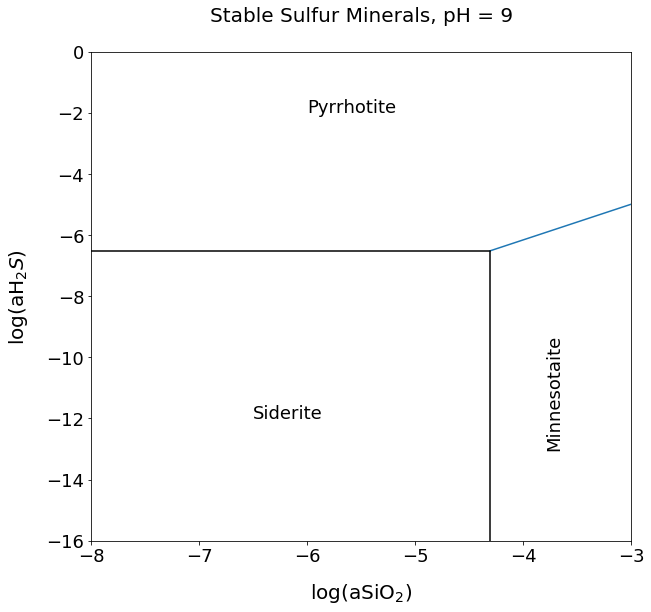

In [6]:

#Sulfur
#pH = 9
H2 = 1 * 10**-4
CO2 = 7 * 10**-5
K9_S = np.zeros(4)
aSiO2 = np.log10(np.logspace(-8,-3,1000))


#Siderite >> Troilite
# K9_S[0] = 2.8283
# aSi9_S0 = np.arange(-10, -4.31, 0.01)
# y9_S0 = np.zeros(len(aSi9_S0))
# y9_S0[0:] = np.log10(CO2) - K9_S[0]

#Troilite >> Pyrite
# K9_S[1] = 2.7445
# aSi9_S1 = np.arange(-10, -4.13, 0.01)
# y9_S1 = np.zeros(len(aSi9_S1))
# y9_S1[0:] = np.log10(H2) - K9_S[1]

### With Troilite: ###

#Pyrrhotite -> Troilite
# y9_S1 = (1/0.125)*(0.0892 + 0.125*-4)

#Troilite -> Siderite
# y9_S4 = -2.828 + np.log10(7e-5)

#Troilite >> Minnesotaite
# y9_S2 = (1/3)*(3*(-1.2348) + 4*aSiO2)


###With Pyrrhotite: ###

#Pyrrhotite -> Siderite
y9_S1 = -2.386 + 0.875*np.log10(CO2) + 0.125*np.log10(H2)

#Pyrrhotite -> Minnesotaite
y9_S2 = 0.125*np.log10(H2) - 0.9913 + 1.167*aSiO2


#Pyrite:
#Pyrite >> Minnesotaite
# K9_S[3] = -3.9794
# aSi9_S3 = np.arange(-4.13, 0, 0.01)
# y9_S3 = (1/6)*(3*K9_S[3] + 3*np.log10(H2) + 4*aSi9_S3)


y9_S1line = np.zeros(len(aSiO2))
y9_S1line[:] = y9_S1
x_int,y_int = intersection(aSiO2,y9_S1line,aSiO2,y9_S2)

fig4 = plt.figure(4)
fig4.set_figheight(9)
fig4.set_figwidth(10)
plt.clf()

#Troilite:
#plt.plot(aSi9_S0, y9_S0)
#plt.axhline(y=y9_S1, color = 'k')
#plt.axhline(y=y9_S4,xmin=x_int)#, xmax=x_int)
#plt.plot([-8,x_int],[y9_S4,y9_S4], color = 'k')
#plt.plot(aSi9_S1, y9_S1, color = 'navy')
#plt.plot(aSiO2[aSiO2>x_int], y9_S2[y9_S2>y_int], color = 'k')
#plt.plot(aSiO2, y9_S3)

#Pyrrhotite:
plt.plot([-8, -4.31], [y9_S1, y9_S1], 'k-')
plt.plot(aSiO2[aSiO2>x_int], y9_S2[y9_S2>y_int])

plt.plot([-4.31, -4.31], [-16, y9_S1], color='k')
plt.text(-6, -2, 'Pyrrhotite', fontsize = 18)
#plt.text(-6, -5.5, 'Troilite', fontsize = 18)
plt.text(-6.5, -12, 'Siderite', fontsize = 18, color = 'k')
plt.text(-3.80, -9.7, 'Minnesotaite', fontsize = 18, color = 'k', rotation = 90)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2S$)')
plt.xlim(-8,-3)
plt.ylim(-16,0)
plt.title("Stable Sulfur Minerals, pH = 9") 
#plt.legend(bbox_to_anchor=(1,1), prop={'size': 14})
plt.subplots_adjust(left=0.15)
#plt.subplots_adjust(left=0.2, right=0.85, top=0.8, bottom=0.15)
plt.savefig('Sulfur9.png')


In [7]:
x_int

-4.31

In [8]:


# #Now plot predicted Fe2+ and HS concentrations
# #pH9
# #SiO2_9 = np.logspace(-10, -3, 8) #log value
SiO2 = np.array([-8, -7, -6, -5, -4.3, -4.2, -4.1, -4, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3])
SiO2_11 = np.array([-8, -7, -6.2, -6.1, -6, -5, -4.3, -4.2, -4.1, -4, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3])


# #Fe_9 = np.array([1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 1.415*10**-6, 6.237*10**-7, 2.912*10**-8])
# #Pyrrhotite
Fe_9 = np.array([2.88E-07, 2.88E-07, 2.88E-07, 2.88E-07, 1.69E-07, 1.24E-07, 9.14E-08, 6.72E-08, 4.95E-08, 3.64E-08, 2.68E-08, 1.97E-08, 1.45E-08, 1.07E-08, 7.84E-09, 5.77E-09, 4.24E-09, 3.12E-09])
Fe_11 = np.array([9.35E-10, 9.35E-10, 9.35E-10, 7.98E-10, 6.77E-10, 1.46E-10, 1.88E-11, 1.38E-11, 1.02E-11, 7.49E-12, 5.52E-12, 4.06E-12, 3.00E-12, 2.21E-12, 1.63E-12, 1.21E-12, 8.91E-13, 6.61E-13, 4.91E-13, 3.66E-13])
# #Pyrite
# Pyr_Fe_9 = np.array([2.34E-07, 2.34E-07, 2.34E-07, 2.34E-07, 1.71E-07, 1.26E-07, 9.27E-08, 6.82E-08, 5.02E-08, 3.69E-08, 2.72E-08, 2.00E-08, 1.47E-08, 1.08E-08, 7.95E-09, 5.85E-09, 4.30E-09, 3.17E-09])
# Pyr_Fe_11 = np.array([9.35E-10, 9.35E-10, 8.46E-10, 7.90E-10, 6.77E-10, 1.46E-10, 1.88E-11, 1.38E-11, 1.02E-11, 7.48E-12, 5.50E-12, 4.05E-12, 2.98E-12, 2.19E-12, 1.62E-12, 1.19E-12, 8.76E-13, 6.46E-13, 4.76E-13, 3.51E-13])
    
# #HS_9 = np.array([3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 3.09*10**-6, 6.605*10**-6, 3.535*10**-5])
# #Pyrrhotite
HS_9 = np.array([2.73E-06, 2.73E-06, 2.73E-06, 2.73E-06, 4.65E-06, 6.32E-06, 8.60E-06, 1.17E-05, 1.59E-05, 2.17E-05, 2.95E-05, 4.01E-05, 5.45E-05, 7.41E-05, 0.0001007, 0.0001369, 0.0001861, 0.000253])
HS_11 = np.array([9.67E-06, 9.67E-06, 9.67E-06, 1.13E-05, 1.34E-05, 6.20E-05, 4.82E-04, 0.0006558, 0.0008916, 0.001212, 0.001649, 0.002242, 0.00305, 0.00415, 0.005647, 0.007688, 0.01047, 0.01427, 0.01947, 0.02658])
# #Pyrite
# Pyr_HS_9 = np.array([4.69E-06, 4.69E-06, 4.69E-06, 4.69E-06, 5.48E-06, 6.39E-06, 7.45E-06, 8.69E-06, 1.01E-05, 1.18E-05, 1.38E-05, 1.61E-05, 1.87E-05, 2.18E-05, 2.54E-05, 2.97E-05, 3.46E-05, 4.03E-05])
# Pyr_HS_11 = np.array([2.84E-06, 2.84E-06, 2.99E-06, 3.09E-06, 3.34E-06, 7.19E-06, 2.01E-05, 2.34E-05, 2.73E-05, 3.18E-05, 3.71E-05, 4.33E-05, 5.04E-05, 5.88E-05, 6.86E-05, 8.00E-05, 9.33E-05, 0.0001089, 0.000127, 0.0001482])
  
# #pH 11
# #SiO2_11 = np.array([10**-10, 10**-9, 10**-8, 10**-7, 10**-6.1, 10**-6, 10**-5, 10**-4, 10**-3])
# #Fe_11 = np.array([1.374*10**-9, 1.374*10**-9, 1.374*10**-9, 1.374*10**-9, 1.319*10**-9, 1.185*10**-9, 2.553*10**-10, 1.598*10**-11, 1.323*10**-12])
# #HS_11 = np.array([3.082*10**-6, 3.082*10**-6, 3.082*10**-6, 3.082*10**-6, 3.146*10**-6, 3.319*10**-6, 7.151*10**-6, 2.862*10**-5, 1.753*10**-4])

# #Constrain H2S concentration from INMS
# H2S_upper = (100/(10**6)) * (34.08/18.015) #ppm - 1 g per 10^6 g H2O
# #print(H2S_upper)

# #Saturation States:
quartz = 10**-4.5
# trid = 10**-4.3
# chal = 10**-4.2
# cris = 10**-3.89

# y_ticks = np.ndarray.tolist(np.logspace(-12,-2,6))
# y_labels = np.ndarray.tolist(np.arange(-12,0,2))

# #interpolate over curves
# # SiO2_int = np.logspace(-10, -3, 100)
# # f_HS9 = interp.interp1d(SiO2, HS_9, kind = 'linear')
# # HS9_int = f_HS9(SiO2_int)
# # f_HS11 = interp.interp1d(SiO2_11, HS_11, kind = 'linear')
# # HS11_int = f_HS11(SiO2_int)
# # f_Fe9 = interp.interp1d(SiO2, Fe_9, kind = 'linear')
# # Fe9_int = f_Fe9(SiO2_int)
# # f_Fe11 = interp.interp1d(SiO2_11, Fe_11, kind = 'linear')
# # Fe11_int = f_Fe11(SiO2_int)


# fig5 = plt.figure(5)
# fig5.set_figheight(9)
# fig5.set_figwidth(10)
# plt.clf()
# plt.loglog(SiO2, HS_9, label = 'pH = 9')
# plt.loglog(SiO2_11, HS_11, label = 'pH = 11')
# plt.plot([quartz, quartz], [10**-14, 10**-2], 'k--')
# plt.text(10**-4.7, 10**-3.5, 'quartz saturation', fontsize = 14, rotation = 90)
# #plt.plot([10**-10, 10**0], [H2S_upper, H2S_upper], 'k--')
# #plt.text(10**-9.5, 10**-3.5, 'H$_2$S upper limit from INMS', fontsize = 14)
# plt.xlabel('log(aSiO$_2$)')
# plt.ylabel('log(Concentration)')
# plt.title('Derived HS$^-$ Concentration')
# plt.xlim(10**-10,10**-3)
# plt.ylim(10**-7, 10**-3)
# #plt.xticks(x_ticks, x_labels)
# #plt.yticks(y_ticks, y_labels)
# #plt.setp(ax.get_yticklabels(), visible=False)
# plt.legend(bbox_to_anchor=(0.3,0.2), prop={'size': 18})
# plt.subplots_adjust(left=0.15)
# plt.grid()
# plt.savefig('SulfurConc')


# fig6 = plt.figure(6)
# fig6.set_figheight(9)
# fig6.set_figwidth(10)
# plt.clf()
# plt.loglog(SiO2, Fe_9, label = 'pH = 9')
# plt.plot([quartz, quartz], [10**-14, 10**-2], 'k--')
# plt.loglog(SiO2_11, Fe_11, label = 'pH = 11')
# plt.text(10**-4.7, 10**-3.2, 'quartz saturation', fontsize = 14, rotation = 90)
# plt.xlabel('log(aSiO$_2$)]')
# plt.ylabel('log(Concentration)')
# plt.title('Derived Fe$^{2+}$ Concentration')
# plt.xlim(10**-10,10**-3)
# plt.ylim(10**-12, 10**-2)
# #plt.xticks(x_ticks, x_labels)
# #plt.yticks(y_ticks, y_labels)
# plt.legend(bbox_to_anchor=(0.3,0.2), prop={'size': 18})
# plt.subplots_adjust(left=0.15)
# plt.grid()
# plt.savefig('IronConc')

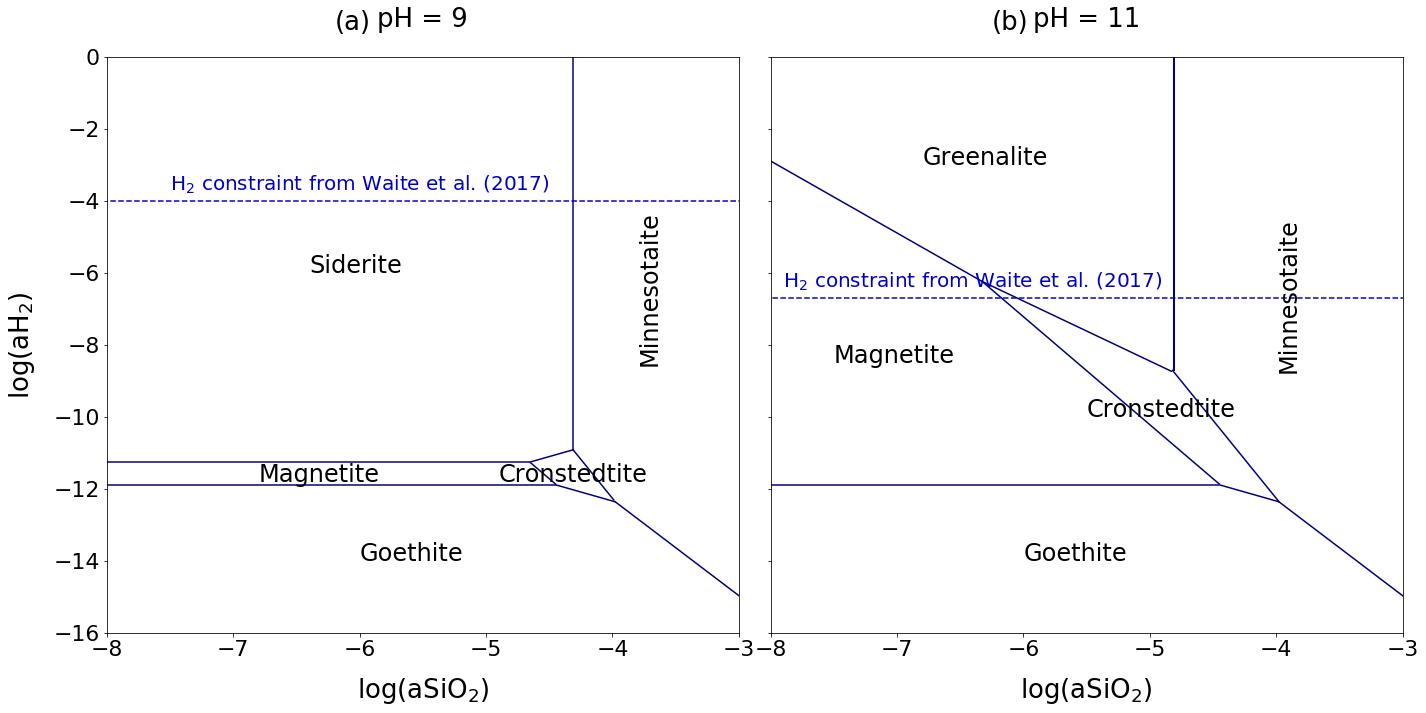

In [9]:
aSiO2_4 = np.log10(np.logspace(-8,-3,500))

#Combine into subplots
plt.rcParams['axes.titlesize'] = 26  
plt.rcParams['axes.labelsize'] = 26  
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22

plt.figure(7)
ax = plt.subplot(121) 
plt.plot(aSi9_Fe0, y9_Fe0, color = 'navy')
plt.plot(aSi9_Fe1, y9_Fe1, color = 'navy')
plt.plot(aSi9_Fe2, y9_Fe2, color = 'navy')
plt.plot(aSi9_Fe3, y9_Fe3, color = 'navy')
plt.plot(aSi9_Fe4, y9_Fe4, color = 'navy')
plt.plot(aSi9_Fe5, y9_Fe5, color = 'navy')
plt.plot(aSi9_Fe6, y9_Fe6, color = 'navy')
plt.plot([-4.31, -4.31], [-10.915, 0], color = 'navy')
plt.text(-6.4, -6, 'Siderite', fontsize = 24)
plt.text(-6.8, -11.8, 'Magnetite', fontsize = 24)
plt.text(-4.9, -11.8, 'Cronstedtite', fontsize = 24)
plt.text(-3.8, -4.8, 'Minnesotaite', fontsize = 24, rotation = 90)
plt.text(-6, -14, 'Goethite', fontsize = 24)
#Plot horizontal lines for hydrogen activity
plt.plot([-10,0],[np.log10(1*10**-4), np.log10(1*10**-4)], '--', color = 'mediumblue')
plt.text(-7.5, -3.7, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 20)
plt.text(-6.2,0.75,'(a)',fontsize=26)
plt.xlabel('log(aSiO$_2$)')
plt.ylabel('log(aH$_2$)')
plt.xlim(-8,-3)
plt.ylim(-16,0)
plt.title("pH = 9") 
#plt.setp(ax.get_xticklabels(), visible=False)

ax = plt.subplot(122) 
plt.plot(aSi11_Fe0, y11_Fe0, color = 'navy')
plt.plot(aSi11_Fe1, y11_Fe1, color = 'navy')
plt.plot(aSi11_Fe2, y11_Fe2, color = 'navy')
plt.plot(aSi11_Fe3, y11_Fe3, color = 'navy')
plt.plot(aSi11_Fe4, y11_Fe4, color = 'navy')
plt.plot(aSi11_Fe5, y11_Fe5, color = 'navy')
plt.plot([y11_Fe6,y11_Fe6], [-8.70,0], color = 'navy')
plt.plot(aSi11_Fe7, y11_Fe7, color = 'navy')
plt.plot([y11_Fe8,y11_Fe8], [y11_Fe4[0], 0], color = 'navy')
plt.plot(aSi11_Fe9, y11_Fe9, color = 'navy')
#plt.text(-9.4, -1.6, 'Siderite', fontsize = 24)
plt.text(-6.8, -3.0, 'Greenalite', fontsize = 24)
plt.text(-7.5, -8.5, 'Magnetite', fontsize = 24)
plt.text(-5.5, -10, 'Cronstedtite', fontsize = 24)
plt.text(-4.0, -5, 'Minnesotaite', fontsize = 24, rotation = 90)
plt.text(-6, -14, 'Goethite', fontsize = 24)
plt.plot([-10,0],[np.log10(2*10**-7), np.log10(2*10**-7)], '--', color = 'mediumblue')
plt.text(-7.9, -6.4, 'H$_{2}$ constraint from Waite et al. (2017)', color = 'mediumblue', fontsize = 20)
plt.text(-6.25,0.75,'(b)',fontsize=26)
plt.xlabel('log(aSiO$_2$)')
plt.xlim(-8,-3)
plt.ylim(-16,0)
plt.title("pH = 11")
#plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

# ax = plt.subplot(223) 
# plt.plot([-8, -4.31], [y9_S1, y9_S1], color = 'navy')
# plt.plot(aSiO2[aSiO2>x_int], y9_S2[y9_S2>y_int], color = 'navy')
# plt.plot([-4.31, -4.31], [-16, y9_S1], color = 'navy')
# plt.text(-6, -3.5, 'Pyrrhotite', fontsize = 24)
# plt.text(-6.5, -12, 'Siderite', fontsize = 24)
# plt.text(-3.80, -9.7, 'Minnesotaite', fontsize = 24, rotation = 90)
# plt.text(-5.65,0.5,'(c)',fontsize=26)
# plt.ylabel('log(aH$_2S$)')
# plt.xlabel('log(aSiO$_2$)')
# plt.xlim(-8,-3)
# plt.ylim(-16,0)
# plt.setp(ax.get_xticklabels(), visible=True)

# ax = plt.subplot(224) 

# plt.plot([-8, x_int1], [y11_S1, y11_S1], color = 'navy')
# plt.plot(aSiO2_4[(x_int1 < aSiO2_4) & (aSiO2_4 < x_int2)], y11_S2[(y_int1 < y11_S2) & (y11_S2 < y_int2)], color = 'navy')
# plt.plot(aSiO2_4[(x_int2 < aSiO2_4) & (aSiO2_4 < x_int3)], y11_S3[(y_int2 < y11_S3) & (y11_S3 < y_int3)], color = 'navy')
# plt.plot(aSiO2_4[(x_int3 < aSiO2_4)], y11_S4[(y_int3 < y11_S4)], color = 'navy')
# plt.plot([x_int1, x_int1], [-16, y_int1], color = 'navy')
# plt.plot([x_int2, x_int2], [-16, y_int2], color = 'navy') #Cronstedtite -> Greenalite
# plt.plot([x_int3, x_int3], [-16, y_int3], color = 'navy') #Cronstedtite -> Greenalite

# plt.text(-6, -4, 'Pyrrhotite', fontsize = 24)
# #plt.text(-6.5, -7.5, 'Troilite', fontsize = 24)
# #plt.text(-5.8, -4.5, 'Pyrite', fontsize = 24)
# plt.text(-7.5, -13, 'Magnetite', fontsize = 24)
# plt.text(-4, -10, 'Minnesotaite', fontsize = 24, rotation = 90)
# plt.text(-6.2, -11, 'Cronstedtite', fontsize = 24, rotation = 90)
# plt.text(-5.5, -11, 'Greenalite', fontsize = 24, rotation = 90)
# plt.text(-5.65,0.5,'(d)',fontsize=26)
# plt.xlim(-8,-3)
# plt.ylim(-16,0)
# plt.xlabel('log(aSiO$_2$)')
# plt.setp(ax.get_xticklabels(), visible=True)
# plt.setp(ax.get_yticklabels(), visible=False)



plt.subplots_adjust(left = 1.0, bottom=-1, right=4.0, top=1,
                 wspace=0.05, hspace=0.1)
plt.savefig('IronandSulfurMineralsPUB.png', bbox_inches = 'tight')
plt.show()


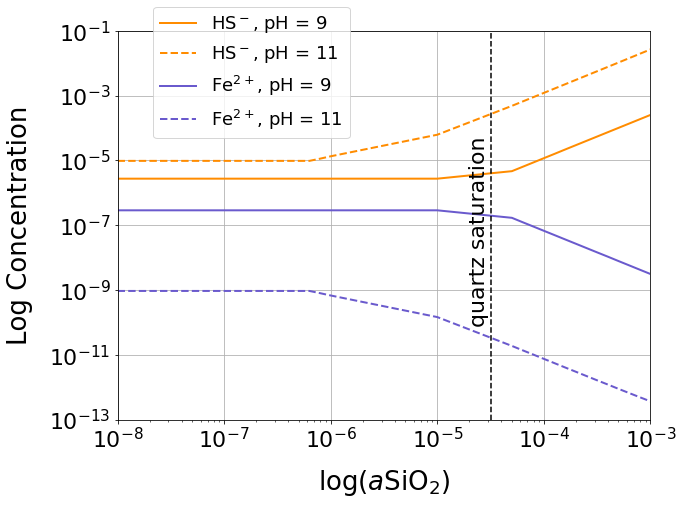

In [10]:
fig8 = plt.figure(8) 
fig8.set_figheight(9)
fig8.set_figwidth(10)
plt.loglog(10**SiO2, HS_9, label = 'HS$^-$, pH = 9', color = 'darkorange', linewidth = 2)
plt.loglog(10**SiO2_11, HS_11, '--', label = 'HS$^-$, pH = 11', color = 'darkorange', linewidth = 2)
#plt.loglog(10**SiO2, Pyr_HS_9, label = 'Pyrite, HS$^-$, pH = 9', color = 'deeppink', linewidth = 3)
#plt.loglog(10**SiO2_11, Pyr_HS_11, '--', label = 'Pyrite, HS$^-$, pH = 11', color = 'deeppink', linewidth = 3)
plt.loglog(10**SiO2, Fe_9, label = 'Fe$^{2+}$, pH = 9', color = 'slateblue', linewidth = 2)
plt.loglog(10**SiO2_11, Fe_11, '--', label = 'Fe$^{2+}$, pH = 11', color = 'slateblue', linewidth = 2)
#plt.loglog(10**SiO2, Pyr_Fe_9, label = 'Pyrite, Fe$^{2+}$, pH = 9', color = 'darkcyan', linewidth = 3)
#plt.loglog(10**SiO2_11, Pyr_Fe_11, '--', label = 'Pyrite, Fe$^{2+}$, pH = 11', color = 'darkcyan', linewidth = 3)
plt.plot([quartz, quartz], [10**-14, 10**-1], 'k--')
plt.text(10**-4.7, 10**-4.75, 'quartz saturation', fontsize = 22, rotation = 90)
plt.xlabel('log($a$SiO$_2$)')
plt.ylabel(r'Log Concentration')
plt.xlim(10**-8,10**-3)
plt.ylim(10**-13,10**-1)
plt.legend(bbox_to_anchor=(0.05,0.7), prop={'size': 18})
plt.grid()
plt.subplots_adjust(left=0.16, right=0.9, top=0.9, bottom=0.3)
plt.savefig('red_conc.png', bbox_inches = 'tight')

In [16]:
#Upper H2S limit from INMS
pH = np.array([9.0, 11.0])
CO2 = np.array([7e-5, 1e-7])

H2S_mix = (100/(1000*1000))*(18/34.1) #(mg H2S/ kgH2O) -> (g/g) -> mol H2S/mol H2O
#this is the same as 100 ppm by mass
print(H2S_mix*100)

CO2_mix = np.array([0.003,0.008])
R_mix = H2S_mix/CO2_mix
print(R_mix)
H2S = R_mix*CO2

print(H2S)

#Now calculate HS-, assuming equilirbium:
K_H2S = -7.395
HS = K_H2S + pH + np.log10(H2S)
print(10**HS)

#print(np.log10(CO2))



0.005278592375366569
[0.01759531 0.00659824]
[1.23167155e-06 6.59824047e-10]
[4.96015116e-05 2.65722383e-06]


In [12]:
1000*1000

1000000

In [13]:
#Fe predicted from specE8 with fixed H2S/HS value
aSiO2_fixedS = np.array([-8, -7, -6, -5, -4.4, -4.3, -4.2, -4.1, -4, -3.9, -3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2, -3.1, -3])
Fe_fixedS = np.array([2.61E-07, 2.61E-07, 2.61E-07, 2.61E-07, 2.61E-07, 2.32E-07, 1.70E-07, 1.25E-07, 9.22E-08, 6.79E-08, 4.99E-08, 3.67E-08, 2.70E-08, 1.99E-08, 1.46E-08, 1.08E-08, 7.91E-09, 5.82E-09, 4.28E-09])

In [14]:
aSiO2_fixedS11 = np.array([-8,-7, -6.2, -6.1, -6, -5.9, -5.8, -5.7, -5.6, -5.5, -5.4, -5.3, -5.2, -5.1, -5, -4.9, -4.8, -4.7, -4.6, -4.5, -4.4, -4.3, -4.2, -4.1, -4, -3.9,-3.8, -3.7, -3.6, -3.5, -3.4, -3.3, -3.2])
Fe_fixedS11 = np.array([8.02E-10, 8.02E-10, 8.02E-10, 7.85E-10, 7.41E-10, 6.41E-10, 5.50E-10, 4.72E-10, 4.05E-10, 3.47E-10, 2.98E-10, 2.55E-10, 2.19E-10, 1.88E-10, 1.61E-10, 1.38E-10, 1.17E-10, 8.64E-11, 6.36E-11, 4.68E-11,3.44E-11, 2.53E-11, 1.86E-11, 1.37E-11, 1.01E-11, 7.42E-12, 5.47E-12, 4.03E-12, 2.97E-12, 2.19E-12, 1.63E-12, 1.23E-12, 9.83E-13])



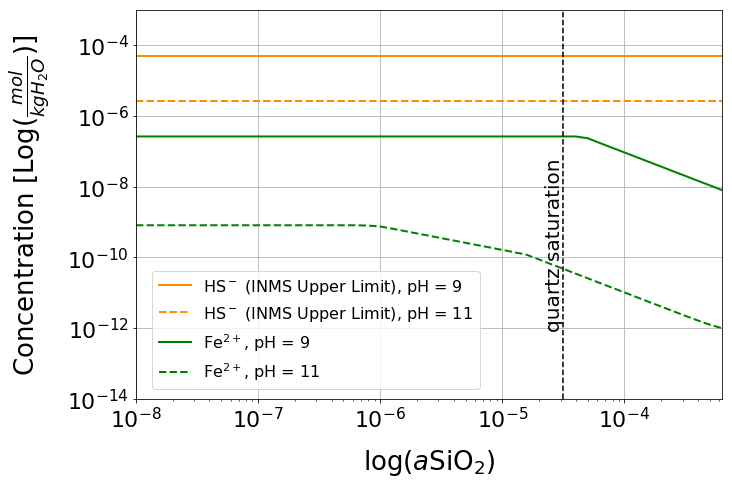

In [15]:
fig8 = plt.figure(8) 
fig8.set_figheight(9)
fig8.set_figwidth(11)
plt.loglog([10**-8,10**-3.2], [10**HS[0],10**HS[0]], label = 'HS$^-$ (INMS Upper Limit), pH = 9', color = 'darkorange', linewidth = 2)
plt.loglog([10**-8,10**-3.2], [10**HS[1],10**HS[1]], '--', label = 'HS$^-$ (INMS Upper Limit), pH = 11', color = 'darkorange', linewidth = 2)
#plt.loglog(10**SiO2, Pyr_HS_9, label = 'Pyrite, HS$^-$, pH = 9', color = 'deeppink', linewidth = 3)
#plt.loglog(10**SiO2_11, Pyr_HS_11, '--', label = 'Pyrite, HS$^-$, pH = 11', color = 'deeppink', linewidth = 3)
#plt.loglog(10**SiO2, Fe_9, label = 'Fe$^{2+}$, pH = 9', color = 'slateblue', linewidth = 2)
#plt.loglog(10**SiO2_11, Fe_11, '--', label = 'Fe$^{2+}$, pH = 11', color = 'slateblue', linewidth = 2)
#plt.loglog(10**SiO2, Pyr_Fe_9, label = 'Pyrite, Fe$^{2+}$, pH = 9', color = 'darkcyan', linewidth = 3)
#plt.loglog(10**SiO2_11, Pyr_Fe_11, '--', label = 'Pyrite, Fe$^{2+}$, pH = 11', color = 'darkcyan', linewidth = 3)
plt.loglog(10**aSiO2_fixedS, Fe_fixedS, label = 'Fe$^{2+}$, pH = 9', color = 'green', linewidth = 2)
plt.loglog(10**aSiO2_fixedS11, Fe_fixedS11, '--', label = 'Fe$^{2+}$, pH = 11', color = 'green', linewidth = 2)
#plt.axhline(y=10**HS[0])
#plt.axhline(y=10**HS[1])
#plt.fill_between(10**SiO2, 10**HS[0], 10**HS[1], color = 'peachpuff', label = 'HS$^-$, INMS Upper Limit')

plt.plot([quartz, quartz], [10**-14, 10**-1], 'k--')
plt.text(10**-4.65, 10**-7.6, 'quartz saturation', fontsize = 20, rotation = 90)
plt.xlabel('log($a$SiO$_2$)')
plt.ylabel(r'Concentration [Log($\frac{mol}{kg H_{2}O}$)]')
plt.xlim(10**-8,10**-3.2)
plt.ylim(10**-14,10**-3)
plt.legend(bbox_to_anchor=(0.6,0.35), prop={'size': 16})
plt.grid()
plt.subplots_adjust(left=0.16, right=0.9, top=0.9, bottom=0.3)
plt.savefig('red_conc.png', bbox_inches = 'tight')

In [107]:
np.log10(7e-5)

-4.1549019599857431